<a href="https://colab.research.google.com/github/champ-rtu/M5_F/blob/main/M5_Forcasting_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import essiatial library for visualization
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# **Preprocessing Data**

In [2]:

# Memory reduction helper function:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns: #columns
        col_type = df[col].dtypes
        if col_type in numerics: #numerics
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [32]:
#read calendar file by pandas
df_cal = pd.read_csv('/content/drive/MyDrive/calendar.csv')
#apply reduce memory function
df_cal = reduce_mem_usage(df_cal)
df_cal.head()

Mem. usage decreased to  0.12 Mb (41.9% reduction)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [36]:
#identify missing value
df_cal.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [4]:
#change datatype to datetime 
df_cal['date'] = pd.to_datetime(df_cal['date'], format='%Y-%m-%d')
df_cal['year'] = df_cal['date'].dt.year
df_cal['month'] = df_cal['date'].dt.month
df_cal['week'] = df_cal['date'].dt.week
df_cal['day'] = df_cal['date'].dt.day

#change null value in event name1,2 and event type1,2 by 0
df_cal['event_name_1'][df_cal['event_name_1'].isnull()] = 0
df_cal['event_name_2'][df_cal['event_name_2'].isnull()] = 0
df_cal['event_type_1'][df_cal['event_type_1'].isnull()] = 0
df_cal['event_type_2'][df_cal['event_type_2'].isnull()] = 0

#Create event num column for indicate that day have event or not
df_cal['event_num'] = pd.Series()
df_cal['event_num'][ df_cal['event_type_1'] != 0] = 1
df_cal['event_num'][df_cal['event_type_2'] != 0] == 2 
df_cal['event_num'][df_cal['event_num'].isnull()] = 0

#Create weekend column 
df_cal['weekend'] = pd.Series()
df_cal['weekend'] [(df_cal['weekday'] == 'Saturday') | (df_cal['weekday'] == 'Sunday')] = 1
df_cal['weekend'][df_cal['weekend'].isnull()] = 0
df_cal.drop(['event_type_2','event_name_2','event_name_1','event_type_1','weekday'], axis=1, inplace=True)
df_cal.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

,date,wm_yr_wk,wday,month,year,d,snap_CA,snap_TX,snap_WI,week,day,event_num,weekend
0,2011-01-29,11101,1,1,2011,d_1,0,0,0,4,29,0.0,1.0
1,2011-01-30,11101,2,1,2011,d_2,0,0,0,4,30,0.0,1.0
2,2011-01-31,11101,3,1,2011,d_3,0,0,0,5,31,0.0,0.0
3,2011-02-01,11101,4,2,2011,d_4,1,1,0,5,1,0.0,0.0
4,2011-02-02,11101,5,2,2011,d_5,1,0,1,5,2,0.0,0.0


In [15]:
#read sale and price data
df_sale = pd.read_csv('/content/drive/MyDrive/sales_train_validation.csv')
df_price =pd.read_csv('/content/drive/MyDrive/sell_prices.csv')

#reduce memory for both file 
df_sale = reduce_mem_usage(df_sale)
df_price = reduce_mem_usage(df_price)

Mem. usage decreased to 95.00 Mb (78.7% reduction)
Mem. usage decreased to 130.48 Mb (37.5% reduction)


In [16]:
#melt the sale dataset
df = df_sale.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                  var_name='d',
                  value_name='Sales')

In [17]:
#merge sale data and calendar data
df_merge = df.merge(df_cal, on ='d')

In [18]:
df_final = df_merge.copy()

In [8]:
#merge df_merge with price data
df_final = df_merge.merge(df_price, on=['store_id', 'item_id', 'wm_yr_wk'])
df_final = reduce_mem_usage(df_final)
df_final.head()

Mem. usage decreased to 3994.51 Mb (30.0% reduction)


,id,item_id,dept_id,cat_id,store_id,state_id,d,Sales,date,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,week,day,event_num,weekend,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,1,1,2011,0,0,0,4,29,0.0,1.0,0.459961
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,2,1,2011,0,0,0,4,30,0.0,1.0,0.459961
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,3,1,2011,0,0,0,5,31,0.0,0.0,0.459961
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,4,2,2011,1,1,0,5,1,0.0,0.0,0.459961
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,5,2,2011,1,0,1,5,2,0.0,0.0,0.459961


# **Data Exploration**

In [25]:
#group by month and wday
month_sale = df_final.groupby(['month'])['Sales'].mean()
day_sale = df_final.groupby(['wday'])['Sales'].mean()

In [23]:
#group by state, category and store
state_sale = df_final.groupby(['state_id'])['Sales'].sum()
cat_sale = df_final.groupby(['cat_id'])['Sales'].sum()
store_sale = df_final.groupby(['store_id'])['Sales'].sum()

#group by event
event_sale = df_final.groupby(['event_num'])['Sales'].mean()

In [28]:
monthlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
daylabel = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


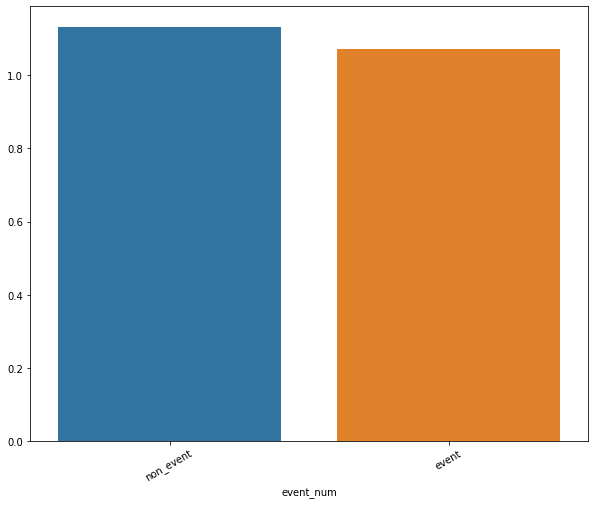

In [21]:
#use barplot for visualze event feature with sales
plt.figure(figsize=(10,8))
mp = sns.barplot(event_sale.index, event_sale.values)
plt.xticks([0,1],['non_event', 'event'], rotation=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


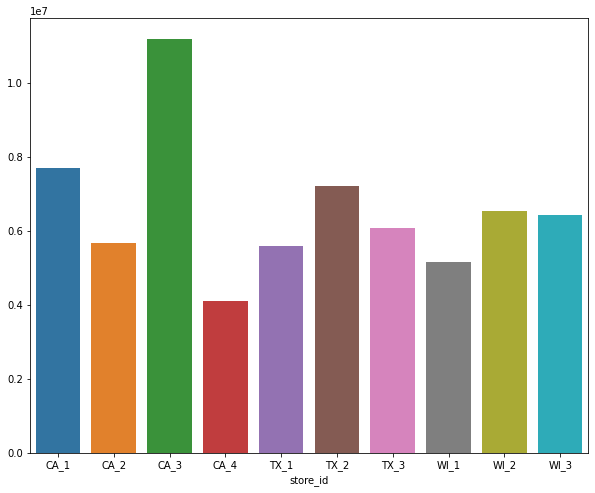

In [24]:
#identify the sales volumn with each store 
plt.figure(figsize=(10,8))
mp = sns.barplot(store_sale.index, store_sale.values)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


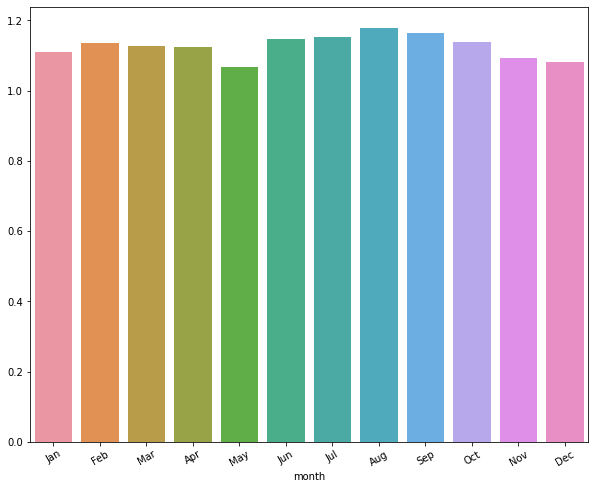

In [29]:
#identify the average sales volumn with each month 
plt.figure(figsize=(10,8))
mp = sns.barplot(month_sale.index, month_sale.values)

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],monthlabel, rotation=30)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


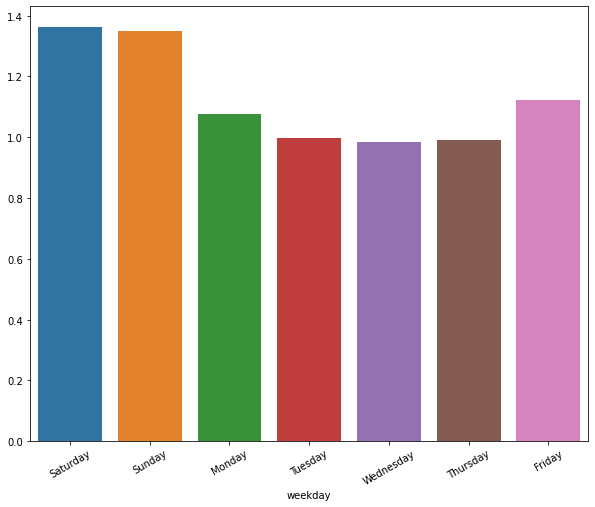

In [30]:
#identify the average sales volumn with each day 
plt.figure(figsize=(10,8))
mp = sns.barplot(day_sale.index, day_sale.values)
plt.xticks([0,1,2,3,4,5,6],daylabel, rotation=30)
plt.xlabel('weekday')
plt.show()


In [46]:
#identify the proportion of each state
fig = px.pie(state_sale,
             values=state_sale.values,
             names=state_sale.index,
             title="Percentage Sale in Each States",
             color_discrete_sequence=px.colors.qualitative.G10_r
            )
fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

<function matplotlib.pyplot.show>

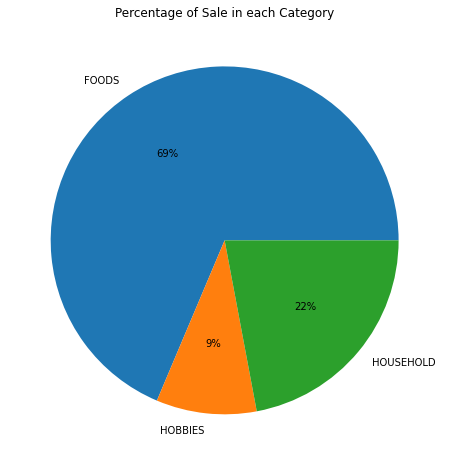

In [43]:
#identify the pecentage of each category
plt.figure(figsize=(10,8))
plt.pie(cat_sale, labels=cat_sale.index, autopct='%.0f%%')
plt.title('Percentage of Sale in each Category')
plt.show

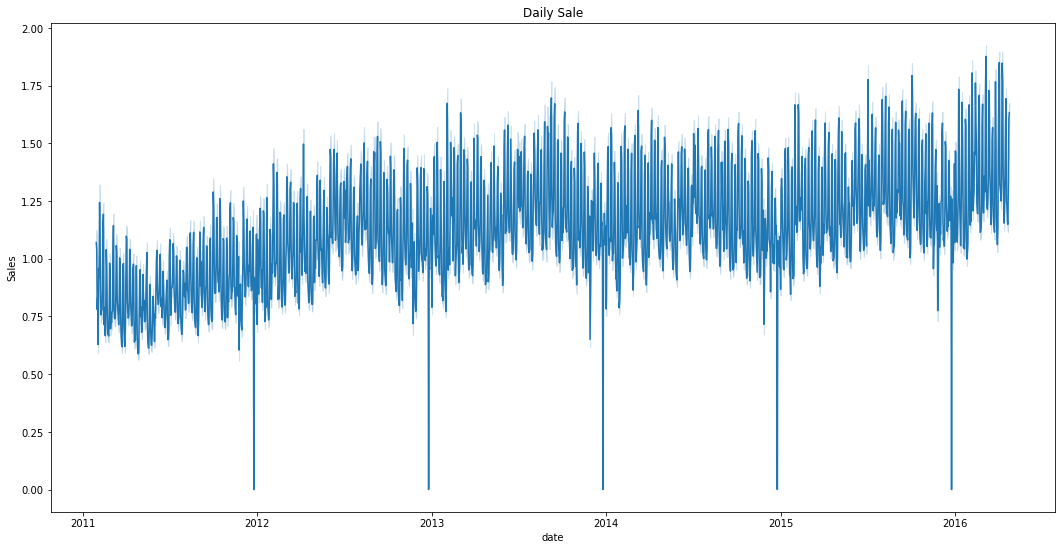

In [11]:
#identify the daily sale
plt.figure(figsize=(18,9))

sns.lineplot(x = 'date', y = 'Sales', data = df_final)
plt.title("Daily Sale")
plt.show()

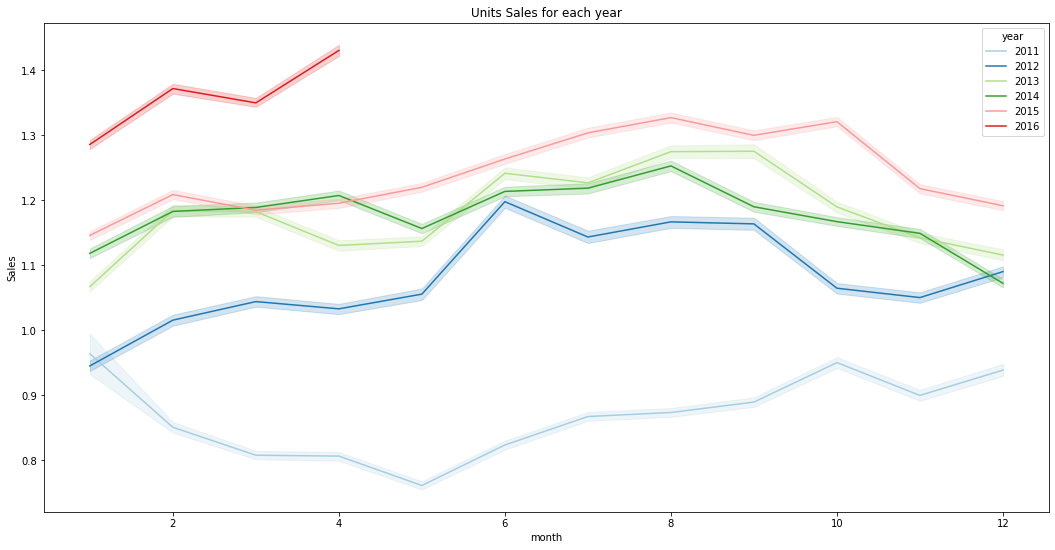

In [22]:
#identify the average sale volumn of each year
plt.figure(figsize=(18,9))

sns.lineplot(x = 'month', y = 'Sales', hue = 'year', data = df_final, palette = "set1")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],monthlabel, rotation=30)
plt.title("Units Sales for each year")
plt.show()